In [22]:
import requests
import re
import matplotlib.pyplot as plt
from ast import literal_eval
from pandas import DataFrame

In [5]:
def getNgrams(query, startYear, endYear, smoothing, caseInsensitive):
    params = dict(content=query, year_start=startYear, year_end=endYear,
                  corpus=15, smoothing=smoothing,
                  case_insensitive=caseInsensitive)
    if params['case_insensitive'] is False:
        params.pop('case_insensitive')
    if '?' in params['content']:
        params['content'] = params['content'].replace('?', '*')
    if '@' in params['content']:
        params['content'] = params['content'].replace('@', '=>')
    req = requests.get('http://books.google.com/ngrams/graph', params=params)
    res = re.findall('var data = (.*?);\\n', req.text)
    if res:
        data = {qry['ngram']: qry['timeseries']
                for qry in literal_eval(res[0])}
        df = DataFrame(data)
        df.insert(0, 'year', list(range(startYear, endYear + 1)))
    else:
        df = DataFrame()
    return params['content'], df

In [74]:
def plotNgrams(dataframe):
    dataframe.plot(x='year',y=dataframe.columns.values[1:])

In [75]:
query='Albert Einstein,Sherlock Holmes,Frankenstein'
year_start=1800
year_end=2000
smoothing=3
caseInsensitive=False

In [18]:
cont,df=getNgrams(query,year_start,year_end,smoothing,caseInsensitive)

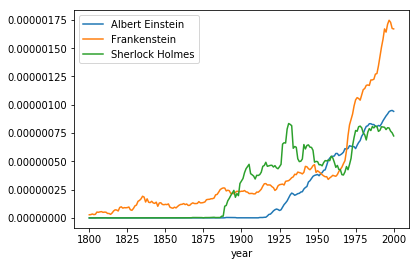

In [76]:
plotNgrams(df)